<a href="https://colab.research.google.com/github/claudiogit2019/About-me/blob/main/Proyecto_de_Video_Juego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import os
import json
import ast
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

**//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////**

# **Lectura y limpieza de steam_games.json.gz**

In [ ]:
file_path = "/content/drive/MyDrive/steam_games.json.gz"
data = []

with gzip.open(file_path, "rt", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

In [ ]:
df_gral = pd.DataFrame(data)

In [ ]:
df_gral.head(2)

publisher genres app_name title  url release_date tags reviews_url  \
0       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
1       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   

   discount_price specs price early_access   id metascore developer  \
0             NaN   NaN   NaN          NaN  NaN       NaN       NaN   
1             NaN   NaN   NaN          NaN  NaN       NaN       NaN   

             user_id           steam_id  \
0  76561197970982479  76561197970982479   
1            js41637  76561198035864385   

                                               items  items_count  
0  [{'item_id': '10', 'item_name': 'Counter-Strik...        277.0  
1  [{'item_id': '10', 'item_name': 'Counter-Strik...        888.0

In [ ]:
df_gral.shape

(120445, 19)

In [ ]:
df_gral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   reviews_url     32133 non-null  object 
 8   discount_price  225 non-null    float64
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  object 
 12  id              32133 non-null  object 
 13  metascore       2677 non-null   object 
 14  developer       28836 non-null  object 
 15  user_id         88310 non-null  object 
 16  steam_id        88310 non-null  object 
 17  items           88310 non-nul

In [ ]:
limpieza_steam_games = df_gral.drop(columns = ['user_id','steam_id','items','items_count'])

In [ ]:
limpieza_steam_games

publisher                                 genres  \
0                   NaN                                    NaN   
1                   NaN                                    NaN   
2                   NaN                                    NaN   
3                   NaN                                    NaN   
4                   NaN                                    NaN   
...                 ...                                    ...   
120440  Ghost_RUS Games  [Casual, Indie, Simulation, Strategy]   
120441           Sacada              [Casual, Indie, Strategy]   
120442     Laush Studio            [Indie, Racing, Simulation]   
120443         SIXNAILS                        [Casual, Indie]   
120444              NaN                                    NaN   

                        app_name                     title  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   
...                          ...                       ...   
120440            Colony On Mars            Colony On Mars   
120441  LOGistICAL: South Africa  LOGistICAL: South Africa   
120442             Russian Roads             Russian Roads   
120443       EXIT 2 - Directions       EXIT 2 - Directions   
120444               Maze Run VR                       NaN   

                                                      url release_date  \
0                                                     NaN          NaN   
1                                                     NaN          NaN   
2                                                     NaN          NaN   
3                                                     NaN          NaN   
4                                                     NaN          NaN   
...                                                   ...          ...   
120440  http://store.steampowered.com/app/773640/Colon...   2018-01-04   
120441  http://store.steampowered.com/app/733530/LOGis...   2018-01-04   
120442  http://store.steampowered.com/app/610660/Russi...   2018-01-04   
120443  http://store.steampowered.com/app/658870/EXIT_...   2017-09-02   
120444  http://store.steampowered.com/app/681550/Maze_...          NaN   

                                                     tags  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
120440              [Strategy, Indie, Casual, Simulation]   
120441                          [Strategy, Indie, Casual]   
120442                        [Indie, Simulation, Racing]   
120443  [Indie, Casual, Puzzle, Singleplayer, Atmosphe...   
120444  [Early Access, Adventure, Indie, Action, Simul...   

                                              reviews_url  discount_price  \
0                                                     NaN             NaN   
1                                                     NaN             NaN   
2                                                     NaN             NaN   
3                                                     NaN             NaN   
4                                                     NaN             NaN   
...                                                   ...             ...   
120440  http://steamcommunity.com/app/773640/reviews/?...            1.49   
120441  http://steamcommunity.com/app/733530/reviews/?...            4.24   
120442  http://steamcommunity.com/app/610660/reviews/?...            1.39   
120443  http://steamcommunity.com/app/658870/reviews/?...             NaN   
120444 

In [ ]:
limpieza_steam_games.shape

(120445, 15)

In [ ]:
fechas_validas = limpieza_steam_games[pd.to_datetime(limpieza_steam_games['release_date'], errors='coerce').notna()]

print(fechas_validas['release_date'])


88310     2018-01-04
88311     2018-01-04
88312     2017-07-24
88313     2017-12-07
88315     2018-01-04
             ...    
120439    2018-01-04
120440    2018-01-04
120441    2018-01-04
120442    2018-01-04
120443    2017-09-02
Name: release_date, Length: 29894, dtype: object


<ipython-input-11-5be772da5ca7>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:

limpieza_steam_gamesX = limpieza_steam_games[pd.to_datetime(limpieza_steam_games['release_date'], errors='coerce').notna()]


<ipython-input-12-80f756e038cb>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
limpieza_steam_gamesX.head(2)

publisher                                         genres  \
88310         Kotoshiro  [Action, Casual, Indie, Simulation, Strategy]   
88311  Making Fun, Inc.           [Free to Play, Indie, RPG, Strategy]   

                  app_name                title  \
88310  Lost Summoner Kitty  Lost Summoner Kitty   
88311            Ironbound            Ironbound   

                                                     url release_date  \
88310  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
88311  http://store.steampowered.com/app/643980/Ironb...   2018-01-04   

                                                    tags  \
88310      [Strategy, Action, Indie, Casual, Simulation]   
88311  [Free to Play, Strategy, Indie, RPG, Card Game...   

                                             reviews_url  discount_price  \
88310  http://steamcommunity.com/app/761140/reviews/?...            4.49   
88311  http://steamcommunity.com/app/643980/reviews/?...             NaN   

                                                   specs         price  \
88310                                    [Single-player]          4.99   
88311  [Single-player, Multi-player, Online Multi-Pla...  Free To Play   

      early_access      id metascore         developer  
88310        False  761140       NaN         Kotoshiro  
88311        False  643980       NaN  Secret Level SRL

In [ ]:
limpieza_steam_gamesX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29894 entries, 88310 to 120443
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       23898 non-null  object 
 1   genres          28660 non-null  object 
 2   app_name        29893 non-null  object 
 3   title           29893 non-null  object 
 4   url             29894 non-null  object 
 5   release_date    29894 non-null  object 
 6   tags            29733 non-null  object 
 7   reviews_url     29893 non-null  object 
 8   discount_price  204 non-null    float64
 9   specs           29225 non-null  object 
 10  price           28818 non-null  object 
 11  early_access    29894 non-null  object 
 12  id              29893 non-null  object 
 13  metascore       2623 non-null   object 
 14  developer       28644 non-null  object 
dtypes: float64(1), object(14)
memory usage: 3.6+ MB


In [ ]:

limpieza_steam_gamesX['price'] = pd.to_numeric(limpieza_steam_gamesX['price'], errors='coerce').fillna(0)
print(limpieza_steam_gamesX)


                  publisher  \
88310             Kotoshiro   
88311      Making Fun, Inc.   
88312          Poolians.com   
88313                  彼岸领域   
88315   Trickjump Games Ltd   
...                     ...   
120439      Bidoniera Games   
120440      Ghost_RUS Games   
120441               Sacada   
120442         Laush Studio   
120443             SIXNAILS   

                                                   genres  \
88310       [Action, Casual, Indie, Simulation, Strategy]   
88311                [Free to Play, Indie, RPG, Strategy]   
88312   [Casual, Free to Play, Indie, Simulation, Sports]   
88313                         [Action, Adventure, Casual]   
88315                     [Action, Adventure, Simulation]   
...                                                   ...   
120439                 [Action, Adventure, Casual, Indie]   
120440              [Casual, Indie, Simulation, Strategy]   
120441                          [Casual, Indie, Strategy]   
120442           

<ipython-input-15-68a98c416bdf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
limpieza_steam_gamesX.head(5)

publisher                                             genres  \
88310            Kotoshiro      [Action, Casual, Indie, Simulation, Strategy]   
88311     Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
88312         Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
88313                 彼岸领域                        [Action, Adventure, Casual]   
88315  Trickjump Games Ltd                    [Action, Adventure, Simulation]   

                      app_name                    title  \
88310      Lost Summoner Kitty      Lost Summoner Kitty   
88311                Ironbound                Ironbound   
88312  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
88313                  弹炸人2222                  弹炸人2222   
88315    Battle Royale Trainer    Battle Royale Trainer   

                                                     url release_date  \
88310  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
88311  http://store.steampowered.com/app/643980/Ironb...   2018-01-04   
88312  http://store.steampowered.com/app/670290/Real_...   2017-07-24   
88313     http://store.steampowered.com/app/767400/2222/   2017-12-07   
88315  http://store.steampowered.com/app/772540/Battl...   2018-01-04   

                                                    tags  \
88310      [Strategy, Action, Indie, Casual, Simulation]   
88311  [Free to Play, Strategy, Indie, RPG, Card Game...   
88312  [Free to Play, Simulation, Sports, Casual, Ind...   
88313                        [Action, Adventure, Casual]   
88315  [Action, Adventure, Simulation, FPS, Shooter, ...   

                                             reviews_url  discount_price  \
88310  http://steamcommunity.com/app/761140/reviews/?...            4.49   
88311  http://steamcommunity.com/app/643980/reviews/?...             NaN   
88312  http://steamcommunity.com/app/670290/reviews/?...             NaN   
88313  http://steamcommunity.com/app/767400/reviews/?...            0.83   
88315  http://steamcommunity.com/app/772540/reviews/?...             NaN   

                                                   specs  price early_access  \
88310                                    [Single-player]   4.99        False   
88311  [Single-player, Multi-player, Online Multi-Pla...   0.00        False   
88312  [Single-player, Multi-player, Online Multi-Pla...   0.00        False   
88313                                    [Single-player]   0.99        False   
88315                [Single-player, Steam Achievements]   3.99        False   

           id metascore            developer  
88310  761140       NaN            Kotoshiro  
88311  643980       NaN     Secret Level SRL  
88312  670290       NaN         Poolians.com  
88313  767400       NaN                 彼岸领域  
88315  772540       NaN  Trickjump Games Ltd

In [ ]:
limpieza_steam_gamesX = limpieza_steam_gamesX.rename(columns={'id':'item_id'})

In [ ]:
# Guardar el DataFrame en un archivo CSV
limpieza_steam_gamesX.to_csv("/content/drive/MyDrive/limpieza_steam_games.csv", index=False)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/limpieza_steam_games.csv')

In [ ]:
df1.shape

(29894, 15)

In [ ]:
df1.head(2)

publisher                                             genres  \
0         Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
1  Making Fun, Inc.       ['Free to Play', 'Indie', 'RPG', 'Strategy']   

              app_name                title  \
0  Lost Summoner Kitty  Lost Summoner Kitty   
1            Ironbound            Ironbound   

                                                 url release_date  \
0  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...   2018-01-04   

                                                tags  \
0  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
1  ['Free to Play', 'Strategy', 'Indie', 'RPG', '...   

                                         reviews_url  discount_price  \
0  http://steamcommunity.com/app/761140/reviews/?...            4.49   
1  http://steamcommunity.com/app/643980/reviews/?...             NaN   

                                               specs  price  early_access  \
0                                  ['Single-player']   4.99         False   
1  ['Single-player', 'Multi-player', 'Online Mult...   0.00         False   

    item_id  metascore         developer  
0  761140.0        NaN         Kotoshiro  
1  643980.0        NaN  Secret Level SRL



```
# Esto tiene formato de código
```

**trabajar con la columna genres de limpieza_steam_games.csv**

In [ ]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df_steam_games = pd.read_csv('/content/drive/MyDrive/limpieza_steam_games.csv')

# Crear un nuevo DataFrame para almacenar los géneros descompuestos
df_genres = pd.DataFrame(columns=['game_id', 'genre'])

# Iterar sobre el DataFrame original
for index, row in df_steam_games.iterrows():
    game_id = row['item_id']
    genres = row['genres']

    # Verificar si genres es un valor no válido (por ejemplo, NaN)
    if pd.notna(genres):
        # Dividir las listas de géneros en cadenas separadas
        genres_list = genres.strip("[]").replace("'", "").split(", ")

        # Crear una fila por cada género
        for genre in genres_list:
            df_genres = df_genres.append({'game_id': game_id, 'genre': genre}, ignore_index=True)

# Combinar los DataFrames df_steam_games y df_genres
df_combined = df_steam_games.merge(df_genres, left_on='item_id', right_on='game_id')

# Mostrar las primeras filas del nuevo DataFrame
print(df_combined.head())







Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-22-847dcb2540cb>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-847dcb2540cb>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-847dcb2540cb>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-847dcb2540cb>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-847dcb2540cb>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-847dcb2540cb>:21: FutureWarning:

The frame.append method is

   publisher                                             genres  \
0  Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
1  Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
2  Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
3  Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
4  Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   

              app_name                title  \
0  Lost Summoner Kitty  Lost Summoner Kitty   
1  Lost Summoner Kitty  Lost Summoner Kitty   
2  Lost Summoner Kitty  Lost Summoner Kitty   
3  Lost Summoner Kitty  Lost Summoner Kitty   
4  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 url release_date  \
0  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
1  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
2  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
3  http://store.steampowered.com/app/7

<ipython-input-22-847dcb2540cb>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-847dcb2540cb>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-847dcb2540cb>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
df_combined.head(4)

publisher                                             genres  \
0  Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
1  Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
2  Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
3  Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   

              app_name                title  \
0  Lost Summoner Kitty  Lost Summoner Kitty   
1  Lost Summoner Kitty  Lost Summoner Kitty   
2  Lost Summoner Kitty  Lost Summoner Kitty   
3  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 url release_date  \
0  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
1  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
2  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
3  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   

                                                tags  \
0  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
1  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
2  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
3  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   

                                         reviews_url  discount_price  \
0  http://steamcommunity.com/app/761140/reviews/?...            4.49   
1  http://steamcommunity.com/app/761140/reviews/?...            4.49   
2  http://steamcommunity.com/app/761140/reviews/?...            4.49   
3  http://steamcommunity.com/app/761140/reviews/?...            4.49   

               specs  price  early_access   item_id  metascore  developer  \
0  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   
1  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   
2  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   
3  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   

    game_id       genre  
0  761140.0      Action  
1  761140.0      Casual  
2  761140.0       Indie  
3  761140.0  Simulation

In [ ]:
df_combined = df_combined.drop(columns = ['genres'],axis=1)

In [ ]:
dfx = pd.read_csv('/content/drive/MyDrive/genero_steam_games.csv')

In [ ]:
dfx.shape

(71013, 16)

In [ ]:
dfx.head(5)

publisher             app_name                title  \
0  Kotoshiro  Lost Summoner Kitty  Lost Summoner Kitty   
1  Kotoshiro  Lost Summoner Kitty  Lost Summoner Kitty   
2  Kotoshiro  Lost Summoner Kitty  Lost Summoner Kitty   
3  Kotoshiro  Lost Summoner Kitty  Lost Summoner Kitty   
4  Kotoshiro  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 url release_date  \
0  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
1  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
2  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
3  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
4  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   

                                                tags  \
0  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
1  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
2  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
3  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
4  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   

                                         reviews_url  discount_price  \
0  http://steamcommunity.com/app/761140/reviews/?...            4.49   
1  http://steamcommunity.com/app/761140/reviews/?...            4.49   
2  http://steamcommunity.com/app/761140/reviews/?...            4.49   
3  http://steamcommunity.com/app/761140/reviews/?...            4.49   
4  http://steamcommunity.com/app/761140/reviews/?...            4.49   

               specs  price  early_access   item_id  metascore  developer  \
0  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   
1  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   
2  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   
3  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   
4  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   

    game_id       genre  
0  761140.0      Action  
1  761140.0      Casual  
2  761140.0       Indie  
3  761140.0  Simulation  
4  761140.0    Strategy

In [ ]:
dfx = dfx.drop(columns = ['publisher',	'app_name',	'title',	'url',	'release_date',	'tags',	'reviews_url',	'discount_price',	'specs',	'price',	'early_access','metascore','game_id'],axis=1)

In [ ]:
dfx.shape


(71013, 3)

In [ ]:
dfx

item_id                 developer       genre
0      761140.0                 Kotoshiro      Action
1      761140.0                 Kotoshiro      Casual
2      761140.0                 Kotoshiro       Indie
3      761140.0                 Kotoshiro  Simulation
4      761140.0                 Kotoshiro    Strategy
...         ...                       ...         ...
71008  610660.0  Laush Dmitriy Sergeevich       Indie
71009  610660.0  Laush Dmitriy Sergeevich      Racing
71010  610660.0  Laush Dmitriy Sergeevich  Simulation
71011  658870.0             xropi,stev3ns      Casual
71012  658870.0             xropi,stev3ns       Indie

[71013 rows x 3 columns]

In [ ]:
# Guardar el nuevo DataFrame en un archivo CSV si es necesario
dfx.to_csv('/content/drive/MyDrive/generos_steam_gamesX.csv', index=False)

**Top 5 de usuarios**

In [ ]:
dfx = pd.read_csv('/content/drive/MyDrive/genero_steam_games.csv')

In [ ]:
dfx.head(1)

publisher             app_name                title  \
0  Kotoshiro  Lost Summoner Kitty  Lost Summoner Kitty   

                                                 url release_date  \
0  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   

                                                tags  \
0  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   

                                         reviews_url  discount_price  \
0  http://steamcommunity.com/app/761140/reviews/?...            4.49   

               specs  price  early_access   item_id  metascore  developer  \
0  ['Single-player']   4.99         False  761140.0        NaN  Kotoshiro   

    game_id   genre  
0  761140.0  Action

In [ ]:
dfx = dfx.drop(columns = ['publisher',	'app_name',	'title',	'url',	'tags',	'reviews_url','discount_price',	'specs',	'price',	'early_access',	'metascore','game_id'],axis=1)

In [ ]:
dfx

release_date   item_id                 developer       genre
0       2018-01-04  761140.0                 Kotoshiro      Action
1       2018-01-04  761140.0                 Kotoshiro      Casual
2       2018-01-04  761140.0                 Kotoshiro       Indie
3       2018-01-04  761140.0                 Kotoshiro  Simulation
4       2018-01-04  761140.0                 Kotoshiro    Strategy
...            ...       ...                       ...         ...
71008   2018-01-04  610660.0  Laush Dmitriy Sergeevich       Indie
71009   2018-01-04  610660.0  Laush Dmitriy Sergeevich      Racing
71010   2018-01-04  610660.0  Laush Dmitriy Sergeevich  Simulation
71011   2017-09-02  658870.0             xropi,stev3ns      Casual
71012   2017-09-02  658870.0             xropi,stev3ns       Indie

[71013 rows x 4 columns]

In [ ]:
dfx

release_date   item_id                 developer       genre
0       2018-01-04  761140.0                 Kotoshiro      Action
1       2018-01-04  761140.0                 Kotoshiro      Casual
2       2018-01-04  761140.0                 Kotoshiro       Indie
3       2018-01-04  761140.0                 Kotoshiro  Simulation
4       2018-01-04  761140.0                 Kotoshiro    Strategy
...            ...       ...                       ...         ...
71008   2018-01-04  610660.0  Laush Dmitriy Sergeevich       Indie
71009   2018-01-04  610660.0  Laush Dmitriy Sergeevich      Racing
71010   2018-01-04  610660.0  Laush Dmitriy Sergeevich  Simulation
71011   2017-09-02  658870.0             xropi,stev3ns      Casual
71012   2017-09-02  658870.0             xropi,stev3ns       Indie

[71013 rows x 4 columns]

In [ ]:
dfx['release_date'] = pd.to_datetime(dfx['release_date']).dt.year

<ipython-input-37-13e35e0e6e66>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
dfx

release_date   item_id                 developer       genre
0              2018  761140.0                 Kotoshiro      Action
1              2018  761140.0                 Kotoshiro      Casual
2              2018  761140.0                 Kotoshiro       Indie
3              2018  761140.0                 Kotoshiro  Simulation
4              2018  761140.0                 Kotoshiro    Strategy
...             ...       ...                       ...         ...
71008          2018  610660.0  Laush Dmitriy Sergeevich       Indie
71009          2018  610660.0  Laush Dmitriy Sergeevich      Racing
71010          2018  610660.0  Laush Dmitriy Sergeevich  Simulation
71011          2017  658870.0             xropi,stev3ns      Casual
71012          2017  658870.0             xropi,stev3ns       Indie

[71013 rows x 4 columns]

In [ ]:
# Guardar el nuevo DataFrame en un archivo CSV si es necesario
dfx.to_csv('/content/drive/MyDrive/release_date_genre.csv', index=False)

In [ ]:
dfx3= pd.read_csv("/content/drive/MyDrive/release_date_genre.csv")

release_date,item_id,developer,genre)

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# **lectura y Limpieza de australian_users_items.json**

In [ ]:
def obtener_datos_json(ruta):
    with gzip.open(ruta, "rt", encoding="utf-8") as file:
        return [ast.literal_eval(line.strip()) for line in file]

ruta = "/content/drive/MyDrive/users_items.json.gz"
datos = obtener_datos_json(ruta)

df = pd.DataFrame(datos)

df.head()

user_id  items_count           steam_id  \
0  76561197970982479          277  76561197970982479   
1            js41637          888  76561198035864385   
2          evcentric          137  76561198007712555   
3         Riot-Punch          328  76561197963445855   
4              doctr          541  76561198002099482   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
1               http://steamcommunity.com/id/js41637   
2             http://steamcommunity.com/id/evcentric   
3            http://steamcommunity.com/id/Riot-Punch   
4                 http://steamcommunity.com/id/doctr   

                                               items  
0  [{'item_id': '10', 'item_name': 'Counter-Strik...  
1  [{'item_id': '10', 'item_name': 'Counter-Strik...  
2  [{'item_id': '1200', 'item_name': 'Red Orchest...  
3  [{'item_id': '10', 'item_name': 'Counter-Strik...  
4  [{'item_id': '300', 'item_name': 'Day of Defea...

In [ ]:
# Descompone la lista en filas separadas
df_items = df.explode('items')

In [ ]:
# Resetear índice del dataframe
df_items.reset_index(drop=True, inplace=True)

In [ ]:
# Creamos las nuevas columnas para cada clave
df_items = pd.concat([df_items, pd.json_normalize(df_items['items'])], axis=1)

In [ ]:
df_items.head(20000)

user_id  items_count           steam_id  \
0      76561197970982479          277  76561197970982479   
1      76561197970982479          277  76561197970982479   
2      76561197970982479          277  76561197970982479   
3      76561197970982479          277  76561197970982479   
4      76561197970982479          277  76561197970982479   
...                  ...          ...                ...   
19995  76561198049968536           53  76561198049968536   
19996  76561198049968536           53  76561198049968536   
19997  76561198049968536           53  76561198049968536   
19998  76561198049968536           53  76561198049968536   
19999  76561198056392326          141  76561198056392326   

                                                user_url  \
0      http://steamcommunity.com/profiles/76561197970...   
1      http://steamcommunity.com/profiles/76561197970...   
2      http://steamcommunity.com/profiles/76561197970...   
3      http://steamcommunity.com/profiles/76561197970...   
4      http://steamcommunity.com/profiles/76561197970...   
...                                                  ...   
19995  http://steamcommunity.com/profiles/76561198049...   
19996  http://steamcommunity.com/profiles/76561198049...   
19997  http://steamcommunity.com/profiles/76561198049...   
19998  http://steamcommunity.com/profiles/76561198049...   
19999  http://steamcommunity.com/profiles/76561198056...   

                                                   items item_id  \
0      {'item_id': '10', 'item_name': 'Counter-Strike...      10   
1      {'item_id': '20', 'item_name': 'Team Fortress ...      20   
2      {'item_id': '30', 'item_name': 'Day of Defeat'...      30   
3      {'item_id': '40', 'item_name': 'Deathmatch Cla...      40   
4      {'item_id': '50', 'item_name': 'Half-Life: Opp...      50   
...                                                  ...     ...   
19995  {'item_id': '497811', 'item_name': 'CS:GO Play...  497811   
19996  {'item_id': '497812', 'item_name': 'CS:GO Play...  497812   
19997  {'item_id': '497813', 'item_name': 'CS:GO Play...  497813   
19998  {'item_id': '444560', 'item_name': 'Agent Orig...  444560   
19999  {'item_id': '29800', 'item_name': 'Caster', 'p...   29800   

                                               item_name  playtime_forever  \
0                                         Counter-Strike               6.0   
1                                  Team Fortress Classic               0.0   
2                                          Day of Defeat               7.0   
3                                     Deathmatch Classic               0.0   
4                              Half-Life: Opposing Force               0.0   
...                                                  ...               ...   
19995          CS:GO Player Profiles: Dupreeh - Astralis               0.0   
19996  CS:GO Player Profiles: Tarik - Counter Logic G...               0.0   
19997          CS:GO Player Profiles: Hiko - Team Liquid               0.0   
19998                              Agent Origins: Escape              10.0   
19999                                             Caster             356.0   

       playtime_2weeks  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
19995              0.0  
19996              0.0  
19997              0.0  
19998              0.0  
19999              0.0  

[20000 rows x 9 columns]

In [ ]:
df_items = df_items.drop(columns = ['steam_id','items','playtime_2weeks'],axis=1)

In [ ]:
df_items.shape

(5170015, 6)

In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170015 entries, 0 to 5170014
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   user_url          object 
 3   item_id           object 
 4   item_name         object 
 5   playtime_forever  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 236.7+ MB


In [ ]:
df_items.duplicated().sum()

59209

In [ ]:
df_items.drop_duplicates(inplace=True)

In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110806 entries, 0 to 5170014
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   user_url          object 
 3   item_id           object 
 4   item_name         object 
 5   playtime_forever  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 272.9+ MB


In [ ]:
df_items.isnull().sum()

user_id                 0
items_count             0
user_url                0
item_id             16714
item_name           16714
playtime_forever    16714
dtype: int64

In [ ]:
df_items.dropna(inplace=True)

In [ ]:
df_items.isnull().sum()

user_id             0
items_count         0
user_url            0
item_id             0
item_name           0
playtime_forever    0
dtype: int64

In [ ]:
df_items.shape

(5094092, 6)

In [ ]:
df_items[20:22]

user_id  items_count  \
20  76561197970982479          277   
21  76561197970982479          277   

                                             user_url item_id  \
20  http://steamcommunity.com/profiles/76561197970...     320   
21  http://steamcommunity.com/profiles/76561197970...     340   

                  item_name  playtime_forever  
20  Half-Life 2: Deathmatch               0.0  
21  Half-Life 2: Lost Coast              37.0

In [ ]:
df_items = df_items.loc[df_items['playtime_forever'] != 0.0]


In [ ]:
df_items.shape

(3246362, 6)

In [ ]:
# Guardar el DataFrame en un archivo CSV
df_items.to_csv("/content/drive/MyDrive/limpieza_user_items.csv", index=False)

In [ ]:
df2= pd.read_csv("/content/drive/MyDrive/limpieza_user_items.csv")

In [ ]:
df2.head(15)

user_id  items_count  \
0   76561197970982479          277   
1   76561197970982479          277   
2   76561197970982479          277   
3   76561197970982479          277   
4   76561197970982479          277   
5   76561197970982479          277   
6   76561197970982479          277   
7   76561197970982479          277   
8   76561197970982479          277   
9   76561197970982479          277   
10  76561197970982479          277   
11  76561197970982479          277   
12  76561197970982479          277   
13  76561197970982479          277   
14  76561197970982479          277   

                                             user_url  item_id  \
0   http://steamcommunity.com/profiles/76561197970...       10   
1   http://steamcommunity.com/profiles/76561197970...       30   
2   http://steamcommunity.com/profiles/76561197970...      300   
3   http://steamcommunity.com/profiles/76561197970...      240   
4   http://steamcommunity.com/profiles/76561197970...     3830   
5   http://steamcommunity.com/profiles/76561197970...     2630   
6   http://steamcommunity.com/profiles/76561197970...     3900   
7   http://steamcommunity.com/profiles/76561197970...     3920   
8   http://steamcommunity.com/profiles/76561197970...     6400   
9   http://steamcommunity.com/profiles/76561197970...     6910   
10  http://steamcommunity.com/profiles/76561197970...     7670   
11  http://steamcommunity.com/profiles/76561197970...      220   
12  http://steamcommunity.com/profiles/76561197970...      340   
13  http://steamcommunity.com/profiles/76561197970...      380   
14  http://steamcommunity.com/profiles/76561197970...      400   

                            item_name  playtime_forever  
0                      Counter-Strike               6.0  
1                       Day of Defeat               7.0  
2               Day of Defeat: Source            4733.0  
3              Counter-Strike: Source            1853.0  
4                         Psychonauts             333.0  
5                      Call of Duty 2              75.0  
6         Sid Meier's Civilization IV             338.0  
7                Sid Meier's Pirates!               2.0  
8                    Joint Task Force             286.0  
9   Deus Ex: Game of the Year Edition            2685.0  
10                           BioShock             633.0  
11                        Half-Life 2             696.0  
12            Half-Life 2: Lost Coast              37.0  
13           Half-Life 2: Episode One             168.0  
14                             Portal             173.0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# **Lectura y Limpieza de australian_users_reviews.json**

In [ ]:
def obtener_datos_json(ruta):
    with gzip.open(ruta, "rt", encoding="utf-8") as file:
        return [ast.literal_eval(line.strip()) for line in file]

ruta = "/content/drive/MyDrive/user_reviews.json.gz"
datos = obtener_datos_json(ruta)

df = pd.DataFrame(datos)

df.head()

user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
2          evcentric             http://steamcommunity.com/id/evcentric   
3              doctr                 http://steamcommunity.com/id/doctr   
4          maplemage             http://steamcommunity.com/id/maplemage   

                                             reviews  
0  [{'funny': '', 'posted': 'Posted November 5, 2...  
1  [{'funny': '', 'posted': 'Posted June 24, 2014...  
2  [{'funny': '', 'posted': 'Posted February 3.',...  
3  [{'funny': '', 'posted': 'Posted October 14, 2...  
4  [{'funny': '3 people found this review funny',...

In [ ]:
def extraer_data(df):
    rev = df['reviews'].explode()
    df = df.drop('reviews', axis=1)
    df = df.join(rev.apply(pd.Series))
    return df

In [ ]:
limpieza_user_reviews = extraer_data(df.copy())

In [ ]:
limpieza_user_reviews[3500:3503]

user_id                                           user_url  \
1431  76561198058575754  http://steamcommunity.com/profiles/76561198058...   
1432              ziass                 http://steamcommunity.com/id/ziass   
1432              ziass                 http://steamcommunity.com/id/ziass   

                                 funny                    posted last_edited  \
1431                                    Posted October 21, 2012.               
1432  1 person found this review funny         Posted January 5.               
1432                                            Posted March 11.               

     item_id                                         helpful recommend  \
1431  105600                                  No ratings yet      True   
1432  221100  4 of 4 people (100%) found this review helpful     False   
1432  387970                                  No ratings yet      True   

                                                 review   0  
1431  It is a really good game that includes amzing ... NaN  
1432             You need a super computer to run it... NaN  
1432                  make me want to kill myself 10/10 NaN

In [ ]:
limpieza_user_reviews['posted'] = limpieza_user_reviews['posted'].str.extract(r'(\w+\s\d+,\s\d{4})')[0]


limpieza_user_reviews['posted'] = pd.to_datetime(limpieza_user_reviews['posted'], format='%B %d, %Y').dt.strftime('%d-%m-%Y')


print(limpieza_user_reviews)


                 user_id                                           user_url  \
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1                js41637               http://steamcommunity.com/id/js41637   
1                js41637               http://steamcommunity.com/id/js41637   
...                  ...                                                ...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   

                                  funny      posted

In [ ]:
limpieza_user_reviews.tail(2)

user_id                                  user_url funny posted  \
25798  LydiaMorley  http://steamcommunity.com/id/LydiaMorley          NaN   
25798  LydiaMorley  http://steamcommunity.com/id/LydiaMorley          NaN   

      last_edited item_id         helpful recommend          review   0  
25798                 730  No ratings yet      True              :D NaN  
25798                 440  No ratings yet      True  so much fun :D NaN

In [ ]:
limpieza_user_reviewsX = limpieza_user_reviews[pd.to_datetime(limpieza_user_reviews['posted'], errors='coerce').notna()]

<ipython-input-68-718903082def>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
limpieza_user_reviewsX.tail(2)

user_id                                           user_url  \
25771          ApxLGhost             http://steamcommunity.com/id/ApxLGhost   
25780  76561198267374962  http://steamcommunity.com/profiles/76561198267...   

                                  funny      posted last_edited item_id  \
25771                                    14-12-2015                 730   
25780  1 person found this review funny  29-12-2015              369200   

                                             helpful recommend  \
25771                                 No ratings yet      True   
25780  1 of 2 people (50%) found this review helpful      True   

                                                  review   0  
25771                                 AMAZING GAME 10/10 NaN  
25780  Why I voted yes? 1. Girl characters have boobs... NaN

In [ ]:
limpieza_user_reviewsX = limpieza_user_reviewsX.drop(columns = [0])

In [ ]:
limpieza_user_reviewsX.tail(2)

user_id                                           user_url  \
25771          ApxLGhost             http://steamcommunity.com/id/ApxLGhost   
25780  76561198267374962  http://steamcommunity.com/profiles/76561198267...   

                                  funny      posted last_edited item_id  \
25771                                    14-12-2015                 730   
25780  1 person found this review funny  29-12-2015              369200   

                                             helpful recommend  \
25771                                 No ratings yet      True   
25780  1 of 2 people (50%) found this review helpful      True   

                                                  review  
25771                                 AMAZING GAME 10/10  
25780  Why I voted yes? 1. Girl characters have boobs...

In [ ]:
limpieza_user_reviewsX.shape


(49186, 9)

In [ ]:
# Guardar el DataFrame en un archivo CSV
limpieza_user_reviewsX.to_csv("/content/drive/MyDrive/limpieza_user_reviewsX.csv", index=True)

# **Analisis de Sentimiento**

**consigna: **
 En el dataset user_reviews se incluyen reseñas de juegos hechos por distintos usuarios. Debes crear la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP con la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. Esta nueva columna debe reemplazar la de user_reviews.review para facilitar el trabajo de los modelos de machine learning y el análisis de datos. De no ser posible este análisis por estar ausente la reseña escrita, debe tomar el valor de 1.

**Analsis de Sentimiento** tomada del siguiente articulo, https://neuraldojo.org/proyectos/analisis-de-sentimiento/guia-basica-de-analisis-de-sentimiento-en-python/

**Paso 1: Leer el dataframe**

**Paso 2: Análisis de Datos**

Columna a analizar

posted

recommend

review

In [ ]:
limpieza_user_reviewsX= pd.read_csv('/content/drive/MyDrive/limpieza_user_reviews.csv')

<ipython-input-78-b1a64fef5bd4>:1: DtypeWarning:

Columns (2,3,4,5,6,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
color = sns.color_palette()
py.init_notebook_mode(connected=True)

#Calificaciones de los productos
fig = px.histogram(limpieza_user_reviewsX, x = "recommend")
fig.update_layout(title_text = "recomendacion ")
fig.show()

Ahora crearemos la nube de palabras “wordclouds” más utilizadas en las reseñas empleando la librería “NLTK” y la librería “wordcloud”.

In [ ]:
palabras_ = pd.read_csv('/content/drive/MyDrive/limpieza_user_reviews.csv',
                  na_values=':', usecols=['review'])
palabras_

<ipython-input-80-a571891e1e60>:1: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



review
0       Simple yet with great replayability. In my opi...
1                    It's unique and worth a playthrough.
2       Great atmosphere. The gunplay can be a bit chu...
3       I know what you think when you see this title ...
4       For a simple (it's actually not all that simpl...
...                                                   ...
263034                                     its FUNNNNNNNN
263035  Awesome fantasy game if you don't mind the gra...
263036                                   Prettyy Mad Game
263037                                 AMAZING GAME 10/10
263038  Why I voted yes? 1. Girl characters have boobs...

[263039 rows x 1 columns]

In [ ]:
#lista de palabras mas uitilzadas
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in palabras_.review)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

TypeError: ignored

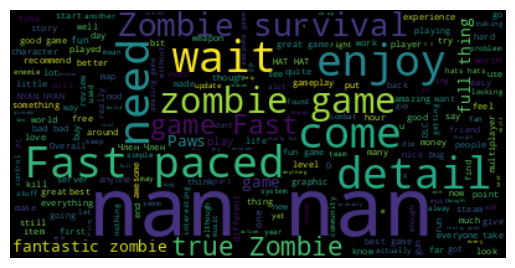

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(review) for review in palabras_.review)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

palabras mas utilizadas:** Game, play, good, fun, friend, love,buy**

**Paso 3: Clasificando los tweets**

Recondaciones  positivas serán clasificadas como +2, y recomendaciones negativas serán clasificadas como 0.

In [ ]:
limpieza_user_reviewsX['sentiment'] = limpieza_user_reviewsX['recommend'].apply(lambda recommended: 2 if recommended else 0)


In [ ]:
limpieza_user_reviewsX[5555:5559]

In [ ]:
# Guardar el DataFrame en un archivo CSV
limpieza_user_reviewsX.to_csv("/content/drive/MyDrive/limpieza_user_reviews.csv", index=True)

In [ ]:
dfx2= pd.read_csv("/content/drive/MyDrive/limpieza_user_reviews.csv")

In [ ]:
dfx2.head(2)

In [ ]:
dfx2 = dfx2.drop(columns = ['review'],axis=1)

In [ ]:
dfx2.tail()

In [ ]:
# Guardar el DataFrame en un archivo CSV
dfx2.to_csv("/content/drive/MyDrive/items_sentimiento.csv", index=False)

**La funcion merge**

In [ ]:
dfx2= pd.read_csv("/content/drive/MyDrive/items_sentimiento.csv")

In [ ]:
dfx2.head(2)

In [ ]:
dfx3.head(2)

In [ ]:
merge_sentiment = pd.merge(dfx2,dfx3, on = "item_id")

In [ ]:
merge_sentiment

In [ ]:
# Guardar el DataFrame en un archivo CSV
merge_sentiment.to_csv("/content/drive/MyDrive/fun_sentimiento.csv", index=False)

In [ ]:
dfxx = pd.read_csv('/content/drive/MyDrive/fun_sentimiento.csv')

In [ ]:
muestra_aux1= dfxx.head(5000)


In [ ]:
muestra_aux1.to_csv("/content/drive/MyDrive/fun_sentimiento.csv", index=False)

**para codigo para tener en cuenta**

In [ ]:
edu = pd.read_csv('files/ch02/educ_figdp_1_Data.csv',
                  na_values=':', usecols=['TIME', 'GEO', 'Value'])
edu

In [ ]:
edu.columns

In [ ]:
edu['Value']

In [ ]:
edu.loc[90:94,['TIME','GEO']]

In [ ]:
edu[edu['Value'] < 6.5].tail()

In [ ]:
edu[edu['Value'].isnull()].tail()

# **EDA( Analisis Exploratorio de Datos)**

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables del dataset, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente 👀 ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en los títulos, ¡podría ayudar al sistema de predicción! En esta ocasión vamos a pedirte que no uses librerías para hacer EDA automático ya que queremos que pongas en práctica los conceptos y tareas involucrados en el mismo.

**Primero importemos datos como dataframes **

In [ ]:
dfx1 = pd.read_csv('/content/drive/MyDrive/genero_steam_games.csv')

In [ ]:
dfx1.tail(3)



```
# Esto tiene formato de código
```

**contemos, Empresa publicadora del contenido**

In [ ]:
counts = dfx1.groupby('publisher').size()

print(counts)


**contemos, app_name, nombre de contenido**

In [ ]:
counts = dfx1.groupby('app_name').size()

print(counts)

**contemos, cantidad de developer y genero**





In [ ]:
counts = dfx1.groupby('developer').size()

print(counts)

In [ ]:
counts = dfx1.groupby('genre').size()

print(counts)

In [ ]:
dfx2= pd.read_csv("/content/drive/MyDrive/limpieza_user_items.csv")

In [ ]:
dfx2.head(3)

**contemos, user_id y item_name**

In [ ]:
counts = dfx2.groupby('user_id').size()

print(counts)

In [ ]:
counts = dfx2.groupby('item_name').size()

print(counts)

In [ ]:
dfx3= pd.read_csv("/content/drive/MyDrive/limpieza_user_reviewsX.csv")

In [ ]:
dfx3.head(3)

**contemos las columnas recommend y posted**

In [ ]:
counts = dfx3.groupby('recommend').size()

print(counts)

In [ ]:
counts = dfx3.groupby('posted').size()

print(counts)

***Muestra Media***

In [ ]:
print('La media de cantidad de juegos: ', dfx2['items_count'].mean(), '.' )
print('La media tiempo de juego: ', dfx2['playtime_forever'].mean(), '.')
print('La media precio de juego: ', dfx1['price'].mean(), '.')

**Varianza y Desviacion  de la Muestra**

In [ ]:
cant_me = dfx2['items_count'].mean()
tiempo_me = dfx2['playtime_forever'].mean()
precio_me = dfx1['price'].mean()

cant_juego_var = dfx2['items_count'].var()
tiempo_de_juego_var = dfx2['playtime_forever'].var()
precio_de_juego_var = dfx1['price'].var()

cant_juego_std = dfx2['items_count'].std()
tiempo_de_juego_std = dfx2['playtime_forever'].std()
precio_de_juego_std = dfx1['price'].std()



In [ ]:
print('Statistics cantidad de juegos: mu:',cant_me , 'var:',cant_juego_var , 'std:',cant_juego_std )
print('Statistics tiempo de juego: mu:', tiempo_me, 'var:', tiempo_de_juego_var, 'std:', tiempo_de_juego_std)
print('Statistics  precio de juego: mu:', precio_me, 'var:', precio_de_juego_var, 'std:', precio_de_juego_std)

**Muestra Mediana**

In [ ]:
cantidad_de_juego_median= dfx2['items_count'].median()
tiempo_de_juego_median= dfx2['playtime_forever'].median()
precio_de_juego_median= dfx1['price'].median()
print("La mediana : ","Cantidad de juego : ", cantidad_de_juego_median,"Tiempo de Juego : ", tiempo_de_juego_median,"Precio de Juego : ",precio_de_juego_median)



**Histograma**

In [ ]:
dfx4 = pd.read_csv('/content/drive/MyDrive/fun_sentimiento.csv')

In [ ]:
dfx4

In [ ]:
import matplotlib.pyplot as plt
ml_date=dfx4['release_date']
ml_date.hist(density=False, histtype='stepfilled', bins=20)

plt.xlabel('Año',fontsize=15)
plt.ylabel('reseñas',fontsize=15)
plt.show()

# **Modelo de aprendizaje automático**

**Es hora de entrenar nuestro modelo de machine learning para armar un sistema de recomendación.**

**Si es un sistema de recomendación item-item:**

def recomendacion_juego( id de producto ): Ingresando el id de producto, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado.


**Si es un sistema de recomendación user-item:**

def recomendacion_usuario( id de usuario ): Ingresando el id de un usuario, deberíamos recibir una lista con 5 juegos recomendados para dicho usuario.

In [ ]:
dfx5 = pd.read_csv('/content/drive/MyDrive/genero_steam_games.csv',
                  na_values=':', usecols=['app_name','tags', 'specs', 'genre'])


In [ ]:
dfx5.head(5)

In [ ]:
dfx5.shape


In [ ]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df_steam_games = pd.read_csv('/content/drive/MyDrive/genero_steam_games.csv')

# Crear un nuevo DataFrame para almacenar las etiquetas descompuestas
df_tags = pd.DataFrame(columns=['item_id', 'tag'])

# Iterar sobre el DataFrame original
for index, row in df_steam_games.iterrows():
    item_id = row['item_id']
    tags = row['tags']

    # Verificar si tags es un valor no válido (por ejemplo, NaN)
    if pd.notna(tags):
        # Dividir las listas de etiquetas en cadenas separadas
        tags_list = tags.strip("[]").replace("'", "").split(", ")

        # Crear una fila por cada etiqueta
        for tag in tags_list:
            df_tags = df_tags.append({'item_id': item_id, 'tag': tag}, ignore_index=True)

# Mostrar las primeras filas del nuevo DataFrame de etiquetas
print(df_tags.head())


In [ ]:
df_tags

In [ ]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df_steam_games = pd.read_csv('/content/drive/MyDrive/genero_steam_games.csv')

# Crear un nuevo DataFrame para almacenar las especificaciones descompuestas
df_specs = pd.DataFrame(columns=['item_id', 'spec'])

# Iterar sobre el DataFrame original
for index, row in df_steam_games.iterrows():
    item_id = row['item_id']
    specs = row['specs']

    # Verificar si specs es un valor no válido (por ejemplo, NaN)
    if pd.notna(specs):
        # Dividir las listas de especificaciones en cadenas separadas
        specs_list = specs.strip("[]").replace("'", "").split(", ")

        # Crear una fila por cada especificación
        for spec in specs_list:
            df_specs = df_specs.append({'item_id': item_id, 'spec': spec}, ignore_index=True)

# Mostrar las primeras filas del nuevo DataFrame de especificaciones
print(df_specs.head())


In [ ]:
df_specs

In [ ]:
merge_recomendacion = pd.merge(df_tags,df_specs, on = "item_id")

In [ ]:
merge_recomendacion

In [ ]:
dfx6 = pd.read_csv('/content/drive/MyDrive/genero_steam_games.csv')

In [ ]:
dfx6[20000:20300]

In [ ]:
dfx7 = dfx6.drop(columns = ['publisher',	'title',	'url','release_date',	'tags',	'reviews_url','discount_price',	'specs',	'price',	'early_access',	'metascore','developer','game_id'],axis=1)

In [ ]:
dfx7

In [ ]:
merge_recomendacion2 = pd.merge(merge_recomendacion,dfx7, on = "item_id")

In [ ]:
merge_recomendacion2

In [ ]:
merge_recomendacion2.shape

In [ ]:
merge_recomendacion2.duplicated().sum()

In [ ]:
merge_recomendacion2.isnull().sum()

In [ ]:
merge_recomendacion2.dropna(inplace=True)

In [ ]:
merge_recomendacion2.isnull().sum()

In [ ]:
# Guardar el DataFrame en un archivo CSV
merge_recomendacion2.to_csv("/content/drive/MyDrive/def_recomendacion.csv", index=False)

In [ ]:
muestra_para_prueba_sist = pd.read_csv('/content/drive/MyDrive/def_recomendacion.csv')

In [ ]:
muestra_para_recomendacion_local = muestra_para_prueba_sist.head(20000)

In [ ]:
# Guardar el DataFrame en un archivo CSV
muestra_para_recomendacion_local.to_csv("/content/drive/MyDrive/def_muestra2_recomendacion.csv", index=False)

**pruebas**

In [ ]:
df2= pd.read_csv("/content/drive/MyDrive/limpieza_user_items.csv")

In [ ]:
merge_de_prueba = pd.merge(df2,df_tags, on = "item_id")

In [ ]:
# Guardar el DataFrame en un archivo CSV
merge_de_prueba.to_csv("/content/drive/MyDrive/aux_merge.csv", index=True)

In [ ]:
lectura_aux = pd.read_csv('/content/drive/MyDrive/aux_merge.csv')

In [ ]:
merge_de_pruebaX= pd.merge(lectura_aux,df_specs,on="item_id")

**Mas Pruebas**

In [ ]:
muestra_aux_df = pd.read_csv('/content/drive/MyDrive/limpieza_user_items.csv')

In [ ]:
limpieza_user_itemsM= muestra_aux_df.head(50000)

In [ ]:
# Guardar el DataFrame en un archivo CSV
limpieza_user_itemsM.to_csv("/content/drive/MyDrive/limpieza_user_itemsYa.csv", index=True)